In [12]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Display the data table for preview
Airports_data_path = "Airport_data.csv"
Population_Density_path = "Population_Density.csv"
Confirmed_Cases_path = "Confirmed_Cases_By_State.csv"

# Read the mouse data and the study results
Airports = pd.read_csv(Airports_data_path)
Population_Density = pd.read_csv(Population_Density_path)
Confirmed_Cases = pd.read_csv(Confirmed_Cases_path)
#Airports.head(10)

In [13]:
Airports.head()

,Airport,State,Code,Rank,Passengers 2009,Rank.1,Passengers 2018,Rank.2,Passengers 2019\t,Recent Change,Percent change,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,"Atlanta, GA (Hartsfield-Jackson Atlanta Intern...",Georgia,ATL,1.0,"42,155,204",1.0,"51,870,637",1.0,"53,504,022",26.9,3.1,NaN,NaN,NaN,NaN,NaN
1,"Los Angeles, CA (Los Angeles International)",California,LAX,3.0,"27,496,850",2.0,"42,736,738",2.0,"42,944,850",56.2,0.5,NaN,NaN,NaN,NaN,NaN
2,"Chicago, IL (Chicago O'Hare International)",Illinois,ORD,2.0,"31,124,151",3.0,"39,907,680",3.0,"40,888,335",31.4,2.5,NaN,NaN,NaN,NaN,NaN
3,"Dallas/Fort Worth, TX (Dallas/Fort Worth Inter...",Texas,DFW,4.0,"26,606,411",4.0,"32,799,363",4.0,"35,778,123",34.5,9.1,NaN,NaN,NaN,NaN,NaN
4,"Denver, CO (Denver International)",Colorado,DEN,5.0,"23,967,369",5.0,"31,364,910",5.0,"33,592,342",40.2,7.1,NaN,NaN,NaN,NaN,NaN


In [14]:
Airports.head()
Airports = Airports.drop(columns=["Rank", "Passengers 2009", "Rank.1", "Passengers 2018",
                                 "Recent Change", "Percent change", "Unnamed: 11", "Unnamed: 12",
                                 "Unnamed: 13", "Unnamed: 14", "Unnamed: 15"])
Airports = Airports.rename(columns={"Rank.2": "Rank",
                                   "Passengers 2019\t": "Passengers 2019"})
#Airports = Airports.drop(Airports[Airports["Rank.2"]>=10].index)
Airports.head(15)

,Airport,State,Code,Rank,Passengers 2019
0,"Atlanta, GA (Hartsfield-Jackson Atlanta Intern...",Georgia,ATL,1.0,"53,504,022"
1,"Los Angeles, CA (Los Angeles International)",California,LAX,2.0,"42,944,850"
2,"Chicago, IL (Chicago O'Hare International)",Illinois,ORD,3.0,"40,888,335"
3,"Dallas/Fort Worth, TX (Dallas/Fort Worth Inter...",Texas,DFW,4.0,"35,778,123"
4,"Denver, CO (Denver International)",Colorado,DEN,5.0,"33,592,342"
5,"New York, NY (John F. Kennedy International)",New York,JFK,6.0,"31,055,358"
6,"San Francisco, CA (San Francisco International)",California,SFO,7.0,"27,708,869"
7,"Seattle, WA (Seattle/Tacoma International)",Washington,SEA,8.0,"24,968,689"
8,"Orlando, FL (Orlando International)",Florida,MCO,9.0,"24,572,339"
9,"Las Vegas, NV (McCarran International)",Nevada,LAS,10.0,"24,462,857"


In [20]:
clean_airports = Airports.dropna(inplace=True)

clean_airports = Airports.set_index("State")

clean_airports = pd.DataFrame(clean_airports['Passengers 2019'])

clean_airports = clean_airports.reset_index()
clean_airports['Passengers 2019'] = clean_airports['Passengers 2019'].str.replace(',','')
clean_airports['Passengers 2019'] = clean_airports['Passengers 2019'].fillna(0)
clean_airports['Passengers 2019'] = clean_airports['Passengers 2019'].astype(int)
clean_airports.head(100)

,State,Passengers 2019
0,Georgia,53504022
1,California,42944850
2,Illinois,40888335
3,Texas,35778123
4,Colorado,33592342
5,New York,31055358
6,California,27708869
7,Washington,24968689
8,Florida,24572339
9,Nevada,24462857


In [21]:
clean_airports.dtypes

State              object
Passengers 2019     int32
dtype: object

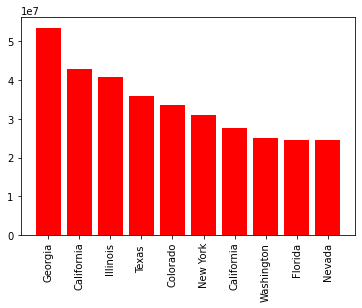

In [22]:
#airports_chart = clean_airports.plot(kind="bar", title="Top 10 US Airports")
#clean_airports = pd.DataFrame(clean_airports['Passengers 2019\t'])
#ax = clean_airports.plot.bar(x='State', y='Passengers 2019\t')
x_axis = np.arange(len(clean_airports))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, clean_airports["Passengers 2019"], color='r', align="center")
plt.xticks(tick_locations, clean_airports["State"], rotation="vertical")
plt.show()

In [18]:
clean_cases = Confirmed_Cases.set_index("State")

clean_cases = pd.DataFrame(clean_cases['Confirmed'])
cases = clean_cases.loc[["California", "Texas", "Florida", "New York", "Illinois",
                             "Georgia", "Ohio", "Pennsylvania", "Arizona", "North Carolina"], :]
cases.head(10)
#clean_cases.head(10)

,Confirmed
State,
California,"3,169,935"
Texas,"2,294,073"
Florida,"1,676,171"
New York,"1,361,151"
Illinois,"1,112,143"
Georgia,"731,826"
Ohio,"878,284"
Pennsylvania,"818,369"
Arizona,"738,561"


In [19]:
x_axis = np.arange(len(cases))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, cases("Confimed"), color='r', align="center")
plt.xticks(tick_locations, cases("State"), rotation="vertical")
plt.show()

TypeError: 'DataFrame' object is not callable

In [ ]:
clean_population = Population_Density.set_index("State")

clean_population = pd.DataFrame(clean_population['Pop'])
state = clean_population.loc[["California", "Texas", "Florida", "New York", "Illinois",
                             "Pennsylvania", "Ohio", "Georgia", "North Carolina", "Michigan"], :]
state.head(10)
#clean_population.head(10)

In [ ]:
x_axis = np.arange(len(clean_airports))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, clean_airports("Passengers 2019"), color='r', align="center")
plt.xticks(tick_locations, clean_airports("State"), rotation="vertical")
plt.show()

In [ ]:
# Combine the data into a single dataset
#bigdata = pd.concat([clean_airports, state, cases])
#merge_data_df = pd.merge(clean_airports, clean_population, clean_cases, on="State")
# Display the data table for preview
#bigdata.head(10)

In [ ]:
# Create a map using state centroid coordinates to set markers
marker_locations = bigdata[['Latitude', 'Longitude']]

# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations,
    info_box_content=[f"Passengers: {clean_airport}" for state in state_location])
fig.add_layer(markers)
fig